Testing document for pyGSLModel

In [1]:
# Downloading pruned model
from pyGSLModel import download_GSL_model

model = download_GSL_model()

Model succesfully downloaded and read in.


In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1"],
    "Sample_1" : [10,5,1],
    "Sample_2" : [1,5,10]
}

test_df = pd.DataFrame(d)

test_df = test_df.set_index("Gene")

test_df

In [ ]:
from pyGSLModel import iMAT_integrate

imat_test = iMAT_integrate(model, test_df)

In [ ]:
imat_test

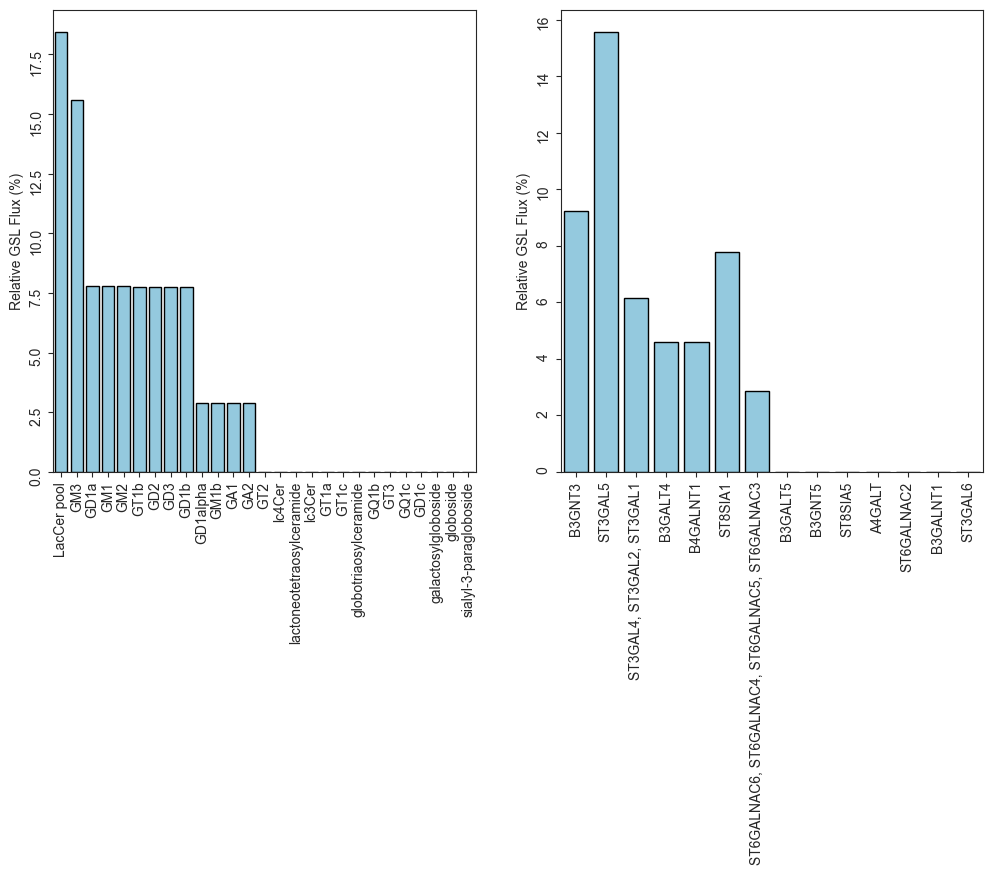

In [2]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

sol = run_metabolic_model(model, method="mFBA", objective_choice="D28_Neuron")

results_df = tabulate_model_results(model,sol)

plot_model_results(results_df)
